In [1]:
import pandas as pd

In [2]:
train_df = pd.read_csv('drop_train.csv')

In [4]:
train_df.drop(['Unnamed: 0'],axis=1)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
55423475,2014-03-15 03:28:00.00000070,14.0,2014-03-15 03:28:00 UTC,-74.005272,40.740027,-73.963280,40.762555,1
55423476,2009-03-24 20:46:20.0000002,4.2,2009-03-24 20:46:20 UTC,-73.957784,40.765530,-73.951640,40.773959,1
55423477,2011-04-02 22:04:24.0000004,14.1,2011-04-02 22:04:24 UTC,-73.970505,40.752325,-73.960537,40.797342,1
55423478,2011-10-26 05:57:51.0000002,28.9,2011-10-26 05:57:51 UTC,-73.980901,40.764629,-73.870605,40.773963,1


In [5]:
# fare_amount가 0보다 작은 것 제외

train_df = train_df.drop(train_df[train_df['fare_amount']<0].index, axis=0)
train_df.shape

(55421026, 9)

In [8]:
#지수표현 변경
pd.options.display.float_format = '{:.5f}'.format

In [9]:
# 승객 수 보기

train_df['passenger_count'].describe()

count   55421026.00000
mean           1.68538
std            1.32765
min            0.00000
25%            1.00000
50%            1.00000
75%            2.00000
max          208.00000
Name: passenger_count, dtype: float64

In [11]:
passen_sort = train_df['passenger_count'].sort_values(ascending=False)

In [18]:
passen_sort.head(76)

33344440    208
21618729    208
12732184    208
53978864    208
4432451     208
           ... 
4095411       9
30444119      9
42647549      9
39624141      9
53781584      9
Name: passenger_count, Length: 76, dtype: int64

위의 결과를 보았을 때 승객 수가 208명인 행들이 약 70개정도 보인다. 하지만 일반적인 택시를 생각했을 때 208명은 불가하다고 생각되어 9명 이하만 고려

In [20]:
#승객 수가 9 이하인 row
train_df_pas = train_df[train_df['passenger_count']<=9]

위도는 -90 ~ 90 <br>
경도는 -180 ~180

In [21]:
#위도가 -90미만인 행이 있는지 탐색
train_df_pas[train_df_pas['pickup_latitude']<-90]

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
150558,150559,2012-08-03 07:43:00.000000176,25.30000,2012-08-03 07:43:00 UTC,0.00000,-3116.28538,-73.95360,40.78800,1
436229,436233,2012-03-11 01:56:00.000000100,4.10000,2012-03-11 01:56:00 UTC,-2986.24249,-880.62743,-3383.29661,-2559.74891,1
542995,543001,2011-10-28 13:53:00.000000178,5.30000,2011-10-28 13:53:00 UTC,-3377.68094,-113.01950,-554.91869,314.79418,1
1281402,1281413,2011-09-02 22:51:00.000000213,11.30000,2011-09-02 22:51:00 UTC,-2256.42123,-1185.39118,-2256.42123,-1185.39118,1
1340826,1340837,2011-06-09 10:39:00.000000137,10.10000,2011-06-09 10:39:00 UTC,2434.23856,-3458.66470,-1281.93379,-104.63765,1
...,...,...,...,...,...,...,...,...,...
54609005,54609376,2011-09-21 17:23:00.000000196,11.70000,2011-09-21 17:23:00 UTC,12.68803,-2474.45231,12.68803,-2474.45231,1
54648174,54648545,2011-07-17 07:23:00.00000033,32.50000,2011-07-17 07:23:00 UTC,-522.80271,-894.61996,2109.91993,840.58498,1
54837920,54838293,2012-02-08 06:46:00.00000033,9.30000,2012-02-08 06:46:00 UTC,1353.46169,-1168.63082,72.83074,-1172.79507,1
55113730,55114105,2011-07-02 17:54:00.000000115,13.30000,2011-07-02 17:54:00 UTC,-1305.73459,-778.58213,1196.89161,3359.84155,1


In [22]:
#위도가 90이상인 행이 있는지 탐색
train_df_pas[train_df_pas['pickup_latitude']>90]

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
5686,5686,2011-07-30 11:15:00.00000082,3.30000,2011-07-30 11:15:00 UTC,-73.94723,401.08333,-73.95139,40.77893,1
174355,174356,2011-11-21 21:36:00.00000081,9.70000,2011-11-21 21:36:00 UTC,2140.60116,1703.09277,-1251.19589,-1189.61544,1
272437,272439,2011-04-23 02:55:00.00000012,9.30000,2011-04-23 02:55:00 UTC,-74.00250,405.35000,-73.97860,40.73996,1
464021,464025,2012-03-05 20:58:00.0000009,6.90000,2012-03-05 20:58:00 UTC,-73.99427,404.96667,-73.97386,40.75546,1
505224,505229,2012-03-05 21:08:00.0000006,9.30000,2012-03-05 21:08:00 UTC,-73.99427,404.96667,-73.98639,40.77690,1
...,...,...,...,...,...,...,...,...,...
54957858,54958232,2011-07-16 13:21:00.00000019,8.90000,2011-07-16 13:21:00 UTC,-73.98616,405.13333,-73.99382,40.76157,3
55055399,55055774,2012-04-26 23:18:00.00000095,23.70000,2012-04-26 23:18:00 UTC,-73.97728,404.70000,-73.98947,40.68408,1
55186543,55186918,2011-08-10 10:05:00.00000018,7.70000,2011-08-10 10:05:00 UTC,-1267.94292,2165.88969,-2593.36764,1598.24797,1
55382871,55383247,2011-11-10 23:25:00.000000223,2.50000,2011-11-10 23:25:00 UTC,-2959.46219,2371.27991,770.67269,-774.44787,1


In [24]:
# 태운 위도가 -90미만인 행 제거
train_df = train_df_pas.drop((train_df_pas[train_df_pas['pickup_latitude']<-90]).index, axis=0)

In [25]:
train_df.shape

(55420617, 9)

In [26]:
#태운 위도가 90 이상인 행 제거
train_df = train_df[train_df['pickup_latitude']<=90]

In [27]:
train_df.shape

(55419944, 9)

In [29]:
# 내려준 위도가 -90미만인 행 제거
train_df = train_df.drop((train_df[train_df['dropoff_latitude']<-90]).index, axis=0)

In [30]:
train_df.shape

(55419888, 9)

In [31]:
# 내려준 위도가 90초과인 행 제거
train_df = train_df.drop((train_df[train_df['dropoff_latitude']>90]).index, axis=0)

In [32]:
train_df.shape

(55419521, 9)

In [33]:
# 태운 경도가 -180미만인 행 제거
train_df = train_df.drop((train_df[train_df['pickup_longitude']<-180]).index, axis=0)

In [34]:
train_df.shape

(55418786, 9)

In [35]:
# 태운 경도가 180초과인 행 제거
train_df = train_df.drop((train_df[train_df['pickup_longitude']>180]).index, axis=0)

In [36]:
train_df.shape

(55418771, 9)

In [37]:
# 내려준 경도가 -180미만인 행 제거
train_df = train_df.drop((train_df[train_df['dropoff_longitude']<-180]).index, axis=0)

In [38]:
train_df.shape

(55418220, 9)

In [39]:
# 내려준 경도가 180초과인 행 제거
train_df = train_df.drop((train_df[train_df['dropoff_longitude']>180]).index, axis=0)

In [40]:
train_df.shape

(55418213, 9)

In [45]:
train_df.to_csv("train_eda.csv")

KeyboardInterrupt: 

### 주요 변수로 생각되는 것
1. passenger num
2. date (month, year)
3. time
4. week (요일)
5. distance

In [ ]:
train_df = pd.read_csv('train_eda.csv')

In [46]:
train = train_df

In [48]:
train

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,0,2009-06-15 17:26:21.0000001,4.50000,2009-06-15 17:26:21 UTC,-73.84431,40.72132,-73.84161,40.71228,1
1,1,2010-01-05 16:52:16.0000002,16.90000,2010-01-05 16:52:16 UTC,-74.01605,40.71130,-73.97927,40.78200,1
2,2,2011-08-18 00:35:00.00000049,5.70000,2011-08-18 00:35:00 UTC,-73.98274,40.76127,-73.99124,40.75056,2
3,3,2012-04-21 04:30:42.0000001,7.70000,2012-04-21 04:30:42 UTC,-73.98713,40.73314,-73.99157,40.75809,1
4,4,2010-03-09 07:51:00.000000135,5.30000,2010-03-09 07:51:00 UTC,-73.96809,40.76801,-73.95665,40.78376,1
...,...,...,...,...,...,...,...,...,...
55423475,55423851,2014-03-15 03:28:00.00000070,14.00000,2014-03-15 03:28:00 UTC,-74.00527,40.74003,-73.96328,40.76255,1
55423476,55423852,2009-03-24 20:46:20.0000002,4.20000,2009-03-24 20:46:20 UTC,-73.95778,40.76553,-73.95164,40.77396,1
55423477,55423853,2011-04-02 22:04:24.0000004,14.10000,2011-04-02 22:04:24 UTC,-73.97051,40.75232,-73.96054,40.79734,1
55423478,55423854,2011-10-26 05:57:51.0000002,28.90000,2011-10-26 05:57:51 UTC,-73.98090,40.76463,-73.87060,40.77396,1


In [57]:
train['datetime'] = pd.to_datetime(train['pickup_datetime'])

KeyboardInterrupt: 

In [47]:
train['Year'] = train['pickup_datetime'].dt.year
train['Month'] = train['pickup_datetime'].dt.month
train['Date'] = train['pickup_datetime'].dt.day
train['Day of Week'] = train['pickup_datetime'].dt.dayofweek
train['Hour'] = train['pickup_datetime'].dt.hour

AttributeError: Can only use .dt accessor with datetimelike values

In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55418213 entries, 0 to 55423479
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   key                object 
 2   fare_amount        float64
 3   pickup_datetime    object 
 4   pickup_longitude   float64
 5   pickup_latitude    float64
 6   dropoff_longitude  float64
 7   dropoff_latitude   float64
 8   passenger_count    int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 4.1+ GB


1. passenger num

In [ ]:
plt.figure(figsize=(15,7))
plt.hist(train['passenger_count'], bins=15)
plt.xlabel('No. of Passengers')
plt.ylabel('빈도수')

In [ ]:
#fare_amount에 영향을 줄까 ?

plt.figure(figsize=(15,7))
plt.scatter(x=train['passenger_count'], y=train['fare_amount'], s=1.5)
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')

2. 날짜요소가 fare_amount에 영향을 줄까 ?

In [ ]:
#날짜 빈도수

plt.figure(figsize=(15,7))
plt.hist(train['Date'], bins=100)
plt.xlabel('Date')
plt.ylabel('빈도수')

In [ ]:
# 날짜 - fare_amount
plt.figure(figsize=(15,7))
plt.scatter(x=train['Date'], y=train['fare_amount'], s=1.5)
plt.xlabel('Date')
plt.ylabel('Fare')

In [ ]:
# 시간 빈도수
plt.figure(figsize=(15,7))
plt.hist(train['Hour'], bins=100)
plt.xlabel('Hour')
plt.ylabel('빈도수')

In [ ]:
# 시간 - fare_amount

plt.figure(figsize=(15,7))
plt.scatter(x=train['Hour'], y=train['fare_amount'], s=1.5)
plt.xlabel('Hour')
plt.ylabel('Fare')

In [ ]:
# 요일 빈도수

plt.figure(figsize=(15,7))
plt.hist(train['Day of Week'], bins=100)
plt.xlabel('Day of Week')
plt.ylabel('빈도수')

In [ ]:
# 요일 - fare_amount
plt.figure(figsize=(15,7))
plt.scatter(x=train['Day of Week'], y=train['fare_amount'], s=1.5)
plt.xlabel('Day of Week')
plt.ylabel('Fare')

In [ ]:
#distance

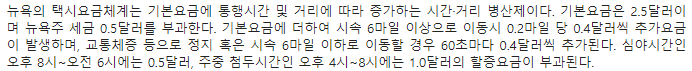

평일 AM 6 ~ PM 4 <br>
평일 PM 4 ~ PM 8 <br>
평일 PM 8 ~ AM 6 <br>
주말